<a href="https://colab.research.google.com/github/DevaanshShah/Care-Reach/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['Age'].isnull().sum()


177

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age'].isnull().sum()


0

In [10]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Embarked'].isnull().sum()


2

In [13]:
df['Cabin'].value_counts(dropna=False)


,count
Cabin,
NaN,687
C23 C25 C27,4
G6,4
B96 B98,4
C22 C26,3
...,...
E34,1
C7,1
C54,1


In [14]:
df['Cabin'] = df['Cabin'].fillna('Missing')


In [15]:
df['Cabin'].isnull().sum()


0

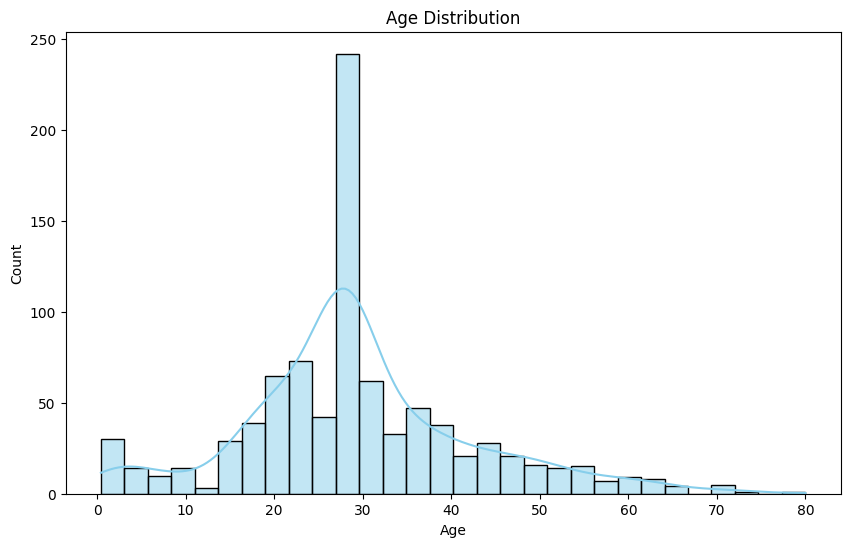

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-20-f45cd7835425>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


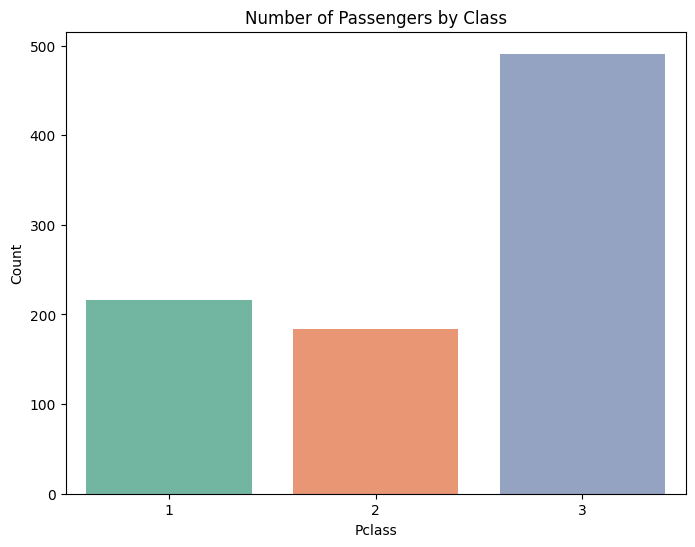

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Number of Passengers by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


<ipython-input-21-d39e36b8940e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


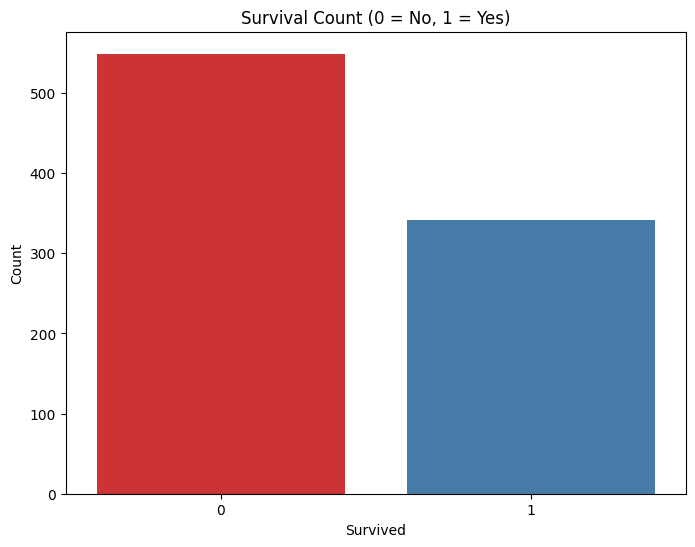

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


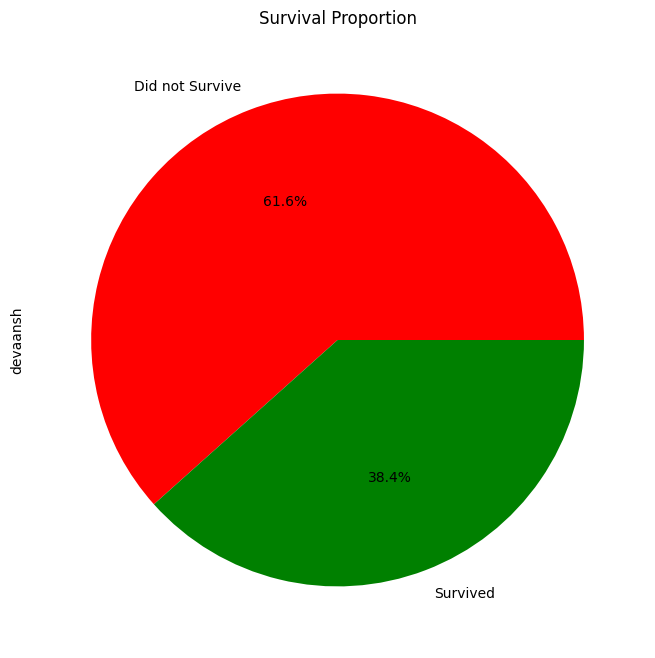

In [47]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(8,8))
survival_counts.plot.pie(autopct='%1.1f%%', colors=['red', 'green'], labels=['Did not Survive', 'Survived'])
plt.title('Survival Proportion')
plt.ylabel('devaansh')
plt.show()


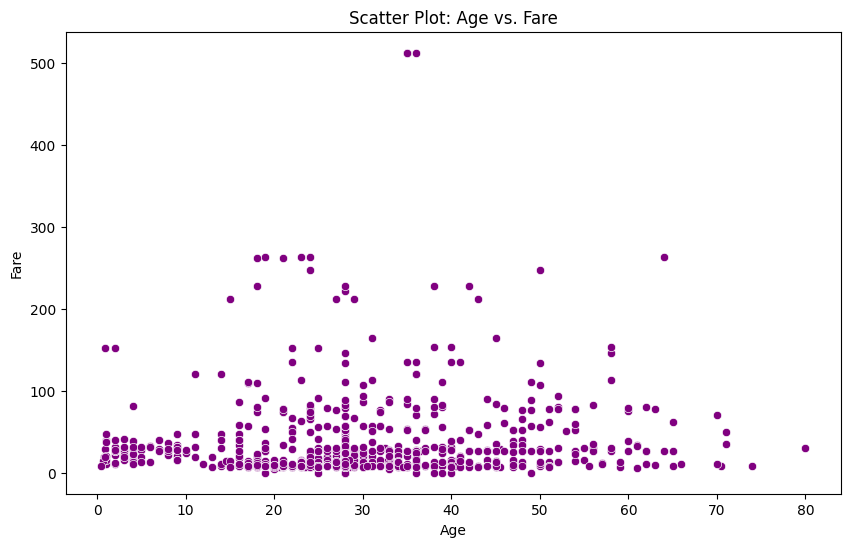

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', data=df, color='purple')
plt.title('Scatter Plot: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [29]:
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))

outliers_iqr_df = df[outlier_condition.any(axis=1)]

print("Outliers detected using IQR:")
print(outliers_iqr_df)


Outliers detected using IQR:
     PassengerId  Survived  Pclass  \
1              2         1       1   
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
..           ...       ...     ...   
849          850         1       1   
851          852         0       3   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
..                                      

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,IsAlone,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,Missing,True,False,True,0,0.059160,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,C85,False,False,False,0,0.059160,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,Missing,False,False,True,1,-0.560975,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,C123,False,False,True,0,0.059160,Adult
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,Missing,True,False,True,1,-0.560975,Adult


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,IsAlone,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,Missing,True,False,True,0,0.059160,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,C85,False,False,False,0,0.059160,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,Missing,False,False,True,1,-0.560975,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,C123,False,False,True,0,0.059160,Adult
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,Missing,True,False,True,1,-0.560975,Adult


In [44]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,IsAlone,FamilySize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,Missing,True,False,True,0,0.059160,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,C85,False,False,False,0,0.059160,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,Missing,False,False,True,1,-0.560975,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,C123,False,False,True,0,0.059160,Adult
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,Missing,True,False,True,1,-0.560975,Adult
5,6,0,3,"Moran, Mr. James",-0.104637,0,0,330877,-0.478116,Missing,True,True,False,1,-0.560975,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",1.893459,0,0,17463,0.395814,E46,True,False,True,1,-0.560975,Middle-Aged
7,8,0,3,"Palsson, Master. Gosta Leonard",-2.102733,3,1,349909,-0.224083,Missing,True,False,True,0,1.919564,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",-0.181487,0,2,347742,-0.424256,Missing,False,False,True,0,0.679295,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",-1.180535,1,0,237736,-0.042956,Missing,False,False,False,0,0.059160,Teenager


In [45]:
df.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,IsAlone,FamilySize,AgeGroup
886,887,0,2,"Montvila, Rev. Juozas",-0.181487,0,0,211536,-0.386671,Missing,True,False,True,1,-0.560975,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",-0.796286,0,0,112053,-0.044381,B42,False,False,True,1,-0.560975,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.104637,1,2,W./C. 6607,-0.176263,Missing,False,False,True,0,1.299429,Adult
889,890,1,1,"Behr, Mr. Karl Howell",-0.258337,0,0,111369,-0.044381,C148,True,False,False,1,-0.560975,Adult
890,891,0,3,"Dooley, Mr. Patrick",0.202762,0,0,370376,-0.492378,Missing,True,True,False,1,-0.560975,Adult


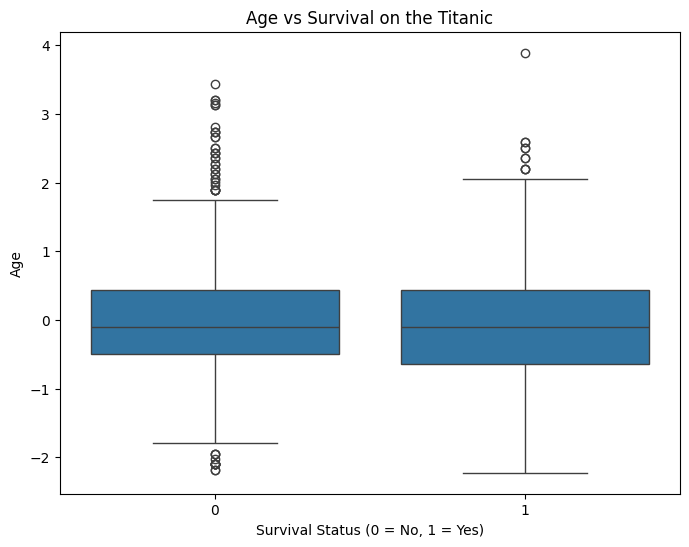

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival on the Titanic')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

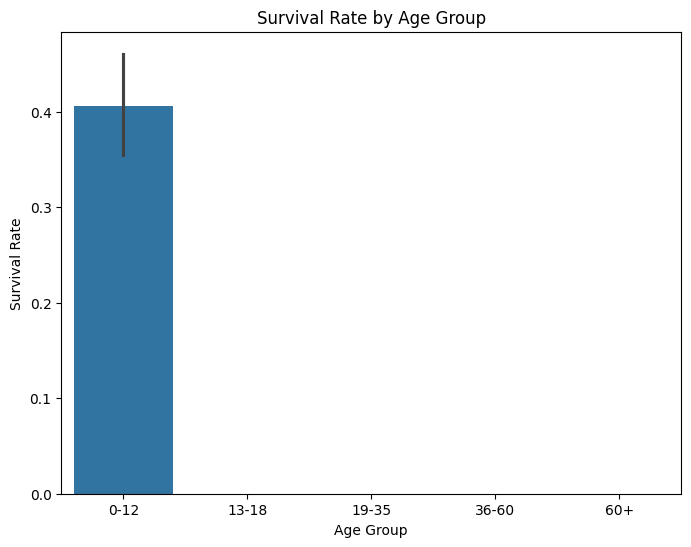

In [59]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['0-12', '13-18', '19-35', '36-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


In [61]:
df1=pd.read_csv('/content/Titanic-Dataset - Copy.csv')

In [62]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [67]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [68]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


TypeError: 'method' object is not subscriptable

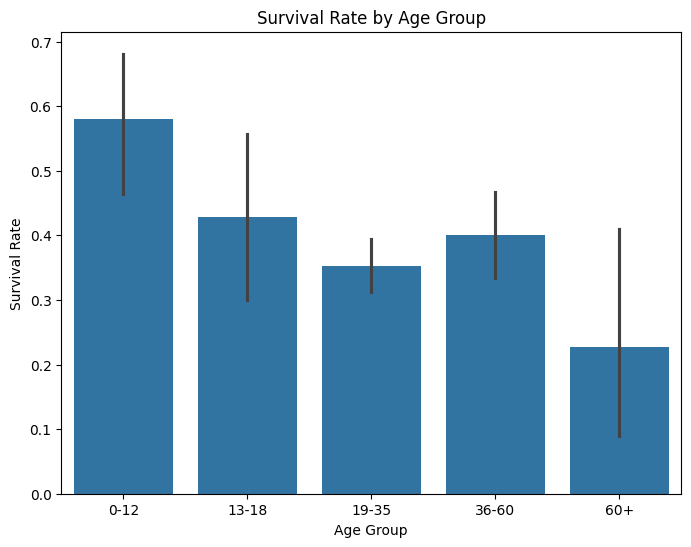

In [70]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['0-12', '13-18', '19-35', '36-60', '60+']
df1['AgeGroup'] = pd.cut(df1['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=df1)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


In [72]:
df_cleaned = df.dropna(subset=['Cabin'])


In [ ]:
print(df_cleaned)
